In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Eric Meinhardt / emeinhardt@ucsd.edu**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-/-loading-data" data-toc-modified-id="Imports-/-loading-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports / loading data</a></span><ul class="toc-item"><li><span><a href="#More-code-for-interfacing-with-Buckeye" data-toc-modified-id="More-code-for-interfacing-with-Buckeye-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>More code for interfacing with Buckeye</a></span></li></ul></li><li><span><a href="#Seyfarth's-utterance-segmentation" data-toc-modified-id="Seyfarth's-utterance-segmentation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Seyfarth's utterance segmentation</a></span><ul class="toc-item"><li><span><a href="#Write-utterance-relation,-vocabulary-and-simple-utterance-list-to-file" data-toc-modified-id="Write-utterance-relation,-vocabulary-and-simple-utterance-list-to-file-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Write utterance relation, vocabulary and simple utterance list to file</a></span><ul class="toc-item"><li><span><a href="#Utterance-relation" data-toc-modified-id="Utterance-relation-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Utterance relation</a></span></li><li><span><a href="#(Orthographic)-Vocabulary" data-toc-modified-id="(Orthographic)-Vocabulary-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>(Orthographic) Vocabulary</a></span></li><li><span><a href="#Simple-utterance-list" data-toc-modified-id="Simple-utterance-list-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Simple utterance list</a></span></li></ul></li><li><span><a href="#Utterance-statistics" data-toc-modified-id="Utterance-statistics-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Utterance statistics</a></span></li></ul></li></ul></div>

# Imports / loading data

In [2]:
import os
import csv
import json

In [3]:
from boilerplate import *

In [4]:
def dictionary_product(dictA, dictB):
    '''
    Given two dictionaries dictA and dictB, this non-statefully 
    creates a 'merged' dictionary.
    
    Note that dictA and dictB must either have disjoint keys,
    or every key they share must map to the same value.
    '''
    keys_A = set(dictA.keys())
    keys_B = set(dictB.keys())
    common_keys = set(keys_A) & set(keys_B)
    conflicting_common_keys = {k for k in common_keys if dictA[k] != dictB[k]}
    assert conflicting_common_keys == set(), 'The dictionaries must have either zero common keys, or all common keys must map to the same value. Conflicting common keys: {0}'.format(conflicting_common_keys)
#     assert common_keys == set(), 'The dictionaries must have no common keys. They share {0}'.format(common_keys)
    
    dictC = dict()
    dictC.update({k:dictA[k] for k in keys_A})
    dictC.update({k:dictB[k] for k in keys_B})
    return dictC

dict_prod = lambda Ds: reduce(dictionary_product, Ds)

In [5]:
project_dir = "/mnt/cube/home/AD/emeinhar/wr"

In [6]:
# see https://github.com/scjs/buckeye 
import buckeye as b

In [7]:
import pandas as pd
from plotnine import *

## More code for interfacing with Buckeye

In [8]:
def isWord(container):
    return type(container) == b.containers.Word

def getWords(track):
    return [w for w in track.words if isWord(w)]
#     return filter(isWord, track.words)

In [9]:
buckeyeUnicodeIPArelation = {
 ('a', 'ʌ'),
 ('aa', 'ɑ'),
 ('aan', 'ɑ̃'),
 ('ae', 'æ'),
 ('aen', 'æ̃'),
 ('ah', 'ʌ'),
 ('ahn', 'ʌ̃'),
 ('an', 'ʌ̃'),
 ('ao', 'ɔ'),
 ('aon', 'ɔ̃'),
 ('aw', 'aʊ'),
 ('awn', 'aʊ'),
 ('ay', 'aɪ'),
 ('ayn', 'aɪ'),
 ('b', 'b'),
 ('ch', 'tʃ'),
 ('d', 'd'),
 ('dh', 'ð'),
 ('dx', 'ɾ'),
 ('eh', 'ɛ'),
 ('ehn', 'ɛ̃'),
 ('el', 'l̩'),
 ('em', 'm̩'),
 ('en', 'n̩'),
 ('eng', 'ŋ̩'),
 ('er', 'ɚ'),
 ('ern', 'ɚ'),
 ('ey', 'eɪ'),
 ('eyn', 'ẽɪ̃'),
 ('f', 'f'),
 ('g', 'g'),
 ('h', 'h'),
 ('hh', 'h'),
 ('hhn', 'h̃'),
 ('i', 'ɪ'),
 ('id', 'ɪ'),
 ('ih', 'ɪ'),
 ('ihn', 'ɪ̃'),
 ('iy', 'i'),
 ('iyih', 'i'),
 ('iyn', 'ĩ'),
 ('jh', 'dʒ'),
 ('k', 'k'),
 ('l', 'l'),
 ('m', 'm'),
 ('n', 'n'),
 ('ng', 'ŋ'),
 ('nx', 'ɾ̃'),
 ('ow', 'oʊ'),
 ('own', 'oʊ'),
 ('oy', 'ɔɪ'),
 ('oyn', 'ɔɪ'),
 ('p', 'p'),
 ('q', 'ʔ'),
 ('r', 'ɹ'),
 ('s', 's'),
 ('sh', 'ʃ'),
 ('t', 't'),
 ('th', 'θ'),
 ('tq', 'ʔ'),
 ('uh', 'ʊ'),
 ('uhn', 'ʊ̃'),
 ('uw', 'u'),
 ('uwix', 'u'),
 ('uwn', 'ũ'),
 ('v', 'v'),
 ('w', 'w'),
 ('y', 'j'),
 ('z', 'z'),
 ('zh', 'ʒ')}

def buckeyeToUnicodeIPA(buckeyeSymbol):
    mapping = dict(buckeyeUnicodeIPArelation)
    #print(mapping)
    return mapping[buckeyeSymbol]

In [10]:
from funcy import compose

def get_orthography(word):
    if word.orthography == 'dont':
        return "don't"
    return word.orthography

def filter_x(segSeq):
    return tuple([seg for seg in segSeq if seg != 'x'])

def intercept(item_to_replace, replacement):
    def transform(el):
        if el == item_to_replace:
            return replacement
        return el
    return transform

def phonemic_vowel_fixer(word, phonemes_IPA):
    if word.orthography == 'uh' and word.phonemic == ['ah', 'ah']:
        return phonemes_IPA[0]
    elif word.orthography == 'o' and word.phonemic == ['ow', 'ow']:
#         print(phonemes_IPA[:1])
        return phonemes_IPA[:1]
    elif word.orthography == 'Ellimen':
        return ('ɛ', 'l', 'ʌ', 'm', 'ɛ', 'n')
    return phonemes_IPA

def phonemic_flap_fixer(word, phonemes_IPA):
    flap_to_d = {"skateboarding",
                 "yadda",
                 "shoulda",
                 "dont",
                 "doody"}
    flap_to_t = {"littlest",
                 "lotta",
                 "introvertal",
                 "shut-outs",
                 "disparity",
                 "exporting",
                 "out-r-inn",
                 "tattletale",
                 "ritalin"}
    replaceWithd = intercept('ɾ', 'd')
    replaceWitht = intercept('ɾ', 't')
    if word.orthography in flap_to_d:
        return tuple(map(replaceWithd, phonemes_IPA))
    elif word.orthography in flap_to_t:
        return tuple(map(replaceWitht, phonemes_IPA))
    else:
        return phonemes_IPA

def fix_phonemes(word, phonemes_IPA):
#     if word.orthography == 'dont' and word.phonemic[-1] == 'tq':
#             return phonemes_IPA[:-1] + ('t',)
    replaceʔ = intercept('ʔ', 't')
    replaceɔ = intercept('ɔ', 'ɑ')
    replaceɾ̃ = intercept('ɾ̃', 'n')
    replacer = compose(replaceʔ, replaceɔ, replaceɾ̃)
    new_phonemes = tuple(map(replacer, phonemes_IPA))
    new_phonemes = phonemic_flap_fixer(word, new_phonemes)
    new_phonemes = phonemic_vowel_fixer(word, new_phonemes)
    return new_phonemes

def get_phonemes(word, inIPA=True, asDottedString=True):
    phonemes = tuple(word.phonemic)
    if inIPA:
        phonemes = filter_x(phonemes)
        phonemes = tuple(map(buckeyeToUnicodeIPA,
                             phonemes))
        phonemes = fix_phonemes(word, phonemes)
    if asDottedString:
        return t2ds(phonemes)
    return phonemes

non_speech_inventory = {'{B_TRANS}',
                        '{E_TRANS}',
                        '',
                        'IVER',
                        'LAUGH',
                        'NOISE',
                        'SIL',
                        'UNKNOWN',
                        'VOCNOISE'}

def id_nonspeech(phone):
    if phone in non_speech_inventory:
        return phone
    return buckeyeToUnicodeIPA(phone)

def get_phones(word, inIPA=True, asDottedString=True):
    if not isWord(word):
        return word.phonetic
    phones = tuple(word.phonetic)
    if inIPA:
        phones = filter_x(phones)
#         phones = tuple(map(buckeyeToUnicodeIPA,
#                            phones))
        phones = tuple(map(id_nonspeech,
                           phones))
    if asDottedString:
        return t2ds(phones)
    return phones

In [11]:
buckeye_dir = '/mnt/cube/home/AD/emeinhar/buckeye-zips'

In [12]:
os.chdir(buckeye_dir)
os.getcwd()
print(os.listdir())

'/mnt/cube/home/AD/emeinhar/buckeye-zips'

['s05.zip', 's02.zip', 's39.zip', 's37.zip', 's30.zip', 's21.zip', 's26.zip', 's28.zip', 's31.zip', 's36.zip', 's38.zip', 's03.zip', 's04.zip', 's15.zip', 's12.zip', 's29.zip', 's27.zip', 's16.zip', 's18.zip', 's24.zip', 's35.zip', 's40.zip', 's09.zip', 's07.zip', 's19.zip', 's17.zip', 's10.zip', 's01.zip', 's06.zip', 's34.zip']


In [13]:
files = os.listdir()

speakers = [b.Speaker.from_zip(file) for file in files]
len(speakers)

tracks = list(union([set(s.tracks) for s in speakers]))
len(tracks)

30

193

In [14]:
s = speakers[0]
t = tracks[0]

In [15]:
def speaker_relation(s):
    r = {
    "speaker_age":s.age,
    "speaker_name":s.name,
    "speaker_interviewer":s.interviewer,
    "speaker_sex":s.sex
    }
    return r

In [16]:
def track_relation(s):
    return {"track_name":s.name}

# Seyfarth's utterance segmentation

In [17]:
def get_utterances(track):
    return [u for u in b.words_to_utterances(track.words)]

In [18]:
utterances = list(union([set(get_utterances(t)) for t in tracks]))
len(utterances)

18771

To be able to (coarse-grainedly) compare utterance segmentation in Buckeye with segmentation in other speech corpora (e.g. Fisher), we want a sequence of orthographic words for each utterance, an utterance duration, and an utterance length

In [19]:
def utterance_relation(utterance):
    words_noPauses = tuple(filter(isWord, utterance.words))
    speech = ' '.join(tuple(map(get_orthography, words_noPauses)))
    beg = utterance.beg
    end = utterance.end
    dur = utterance.dur
    speech_rate = utterance.speech_rate(ignore_missing_syllables=True) #syllables / s
    has_missing_syllables = any(map(lambda w: not hasattr(w, 'syllables'),
                                    utterance.words))
    r = {#'words':words_noPauses,
         'speech':speech,
         'beg':beg,
         'end':end,
         'dur':dur,
         'speech_rate':speech_rate,
         'has_missing_syllables':has_missing_syllables
         }
    return r

In [20]:
utterance_relation(utterances[0])

{'speech': "and the they're not willing to do that for gifted students",
 'beg': 539.208997,
 'end': 542.00433,
 'dur': 2.795333000000028,
 'speech_rate': 5.00834784263623,
 'has_missing_syllables': False}

In [21]:
reduce(dictionary_product, [utterance_relation(utterances[0]), track_relation(t), speaker_relation(s)])

{'speech_rate': 5.00834784263623,
 'end': 542.00433,
 'dur': 2.795333000000028,
 'track_name': 's3903a',
 'speech': "and the they're not willing to do that for gifted students",
 'has_missing_syllables': False,
 'beg': 539.208997,
 'speaker_interviewer': 'f',
 'speaker_name': 's05',
 'speaker_age': 'o',
 'speaker_sex': 'f'}

In [22]:
buckeye_utterance_relation = [dict_prod([speaker_relation(s),
                                         track_relation(t),
                                         utterance_relation(u)])
                              for s in speakers for t in s.tracks for u in get_utterances(t)]
len(buckeye_utterance_relation)
buckeye_utterance_relation[:5]

18771

[{'speaker_interviewer': 'f',
  'track_name': 's0501a',
  'speaker_name': 's05',
  'speaker_age': 'o',
  'speaker_sex': 'f',
  'speech_rate': 5.078163086223139,
  'dur': 0.9846080000000015,
  'end': 41.369375,
  'speech': 'i uh grew up in',
  'has_missing_syllables': False,
  'beg': 40.384767},
 {'speaker_interviewer': 'f',
  'track_name': 's0501a',
  'speaker_name': 's05',
  'speaker_age': 'o',
  'speaker_sex': 'f',
  'speech_rate': 7.211885186787745,
  'dur': 0.5546400000000062,
  'end': 42.642588,
  'speech': 'is this is this',
  'has_missing_syllables': False,
  'beg': 42.087948},
 {'speaker_interviewer': 'f',
  'track_name': 's0501a',
  'speaker_name': 's05',
  'speaker_age': 'o',
  'speaker_sex': 'f',
  'speech_rate': 3.7081988647719957,
  'dur': 2.6967270000000028,
  'end': 45.845388,
  'speech': "because it slipped i since i set it it's okay",
  'has_missing_syllables': True,
  'beg': 43.148661},
 {'speaker_interviewer': 'f',
  'track_name': 's0501a',
  'speaker_name': 's05',
 

In [23]:
utts_w_missing_syllables = list(filter(lambda r: r['has_missing_syllables'],
                                       buckeye_utterance_relation))
len(utts_w_missing_syllables)

8497

Huh...that's a surprisingly laaaarge proportion of utterances...

In [24]:
utts_w_missing_syllables[0]

{'speaker_interviewer': 'f',
 'track_name': 's0501a',
 'speaker_name': 's05',
 'speaker_age': 'o',
 'speaker_sex': 'f',
 'speech_rate': 3.7081988647719957,
 'dur': 2.6967270000000028,
 'end': 45.845388,
 'speech': "because it slipped i since i set it it's okay",
 'has_missing_syllables': True,
 'beg': 43.148661}

## Write utterance relation, vocabulary and simple utterance list to file

 - For further processing, we'll write the utterance relation to file.
 - For further inspection of properties of utterances (shorn of other context) and to facilitate for use with kenlm, we'll write the bare list of utterances to file and the orthographic vocabulary to file.

### Utterance relation

In [25]:
# import json

buckeye_utterances_relation_main_fn = 'buckeye_utterances_relation_main.json'

buckeye_utterances_relation_main_path = os.path.join(project_dir, buckeye_utterances_relation_main_fn)

with open(buckeye_utterances_relation_main_path, 'w', encoding='utf8') as json_file:
    json.dump(buckeye_utterance_relation, json_file, indent=1, ensure_ascii=False)

### (Orthographic) Vocabulary

In [26]:
def word_types_in_utterance(u):
    return set(u['speech'].split(' '))

vocabulary_buckeye = union(map(word_types_in_utterance,
                               buckeye_utterance_relation))
len(vocabulary_buckeye)

7998

In [27]:
'' in vocabulary_buckeye #should be false

False

In [28]:
vocabulary_buckeye_alpha = sorted(list(vocabulary_buckeye))
vocabulary_buckeye_alpha[:10]

["'em",
 'Ellimen',
 'Ellison',
 'Ralph',
 'a',
 "a's",
 "aaron's",
 'abandoned',
 'abercrombie',
 'abhorrent']

In [29]:
%%capture
#cell magic above suppresses useless output of file.write

vocabulary_buckeye_fn = 'buckeye_vocabulary.txt'

vocabulary_buckeye_fp = os.path.join(project_dir, vocabulary_buckeye_fn)

with open(vocabulary_buckeye_fp, 'w') as file:
    for w in vocabulary_buckeye_alpha:
        file.write("{0}\n".format(w));

### Simple utterance list

In [30]:
simple_utts = [u['speech'] for u in buckeye_utterance_relation if u['speech'] != '']

In [31]:
simple_utts[:10]

['i uh grew up in',
 'is this is this',
 "because it slipped i since i set it it's okay",
 'um',
 'uh grew up in cincinnati',
 'i went to school',
 'at rhode island school of design',
 'went east to school um',
 'came back uh',
 'uh to uh got married and came back to']

In [32]:
len(simple_utts)

18771

In [33]:
%%capture
#cell magic above suppresses useless output of file.write

buckeye_utterances_fn = 'buckeye_utterances.txt'

buckeye_utterances_path = os.path.join(project_dir, buckeye_utterances_fn)


with open(buckeye_utterances_path, 'w') as file:

    #write all lines at once using writelines and this takes <1s
    utterances_w_linebreaks = list(map(lambda l: l + "\n", simple_utts))
    file.writelines(utterances_w_linebreaks)
    
    #if someone else is using the machine heavily doing other things, this can take upwards of 2ms
#     for utterance in utterances:
#         file.write("{0}\n".format(utterance));

In [34]:
%pwd

'/mnt/cube/home/AD/emeinhar/buckeye-zips'

In [35]:
project_dir

'/mnt/cube/home/AD/emeinhar/wr'

In [36]:
%cat -n /mnt/cube/home/AD/emeinhar/wr/buckeye_utterances.txt | head -20

     1	i uh grew up in
     2	is this is this
     3	because it slipped i since i set it it's okay
     4	um
     5	uh grew up in cincinnati
     6	i went to school
     7	at rhode island school of design
     8	went east to school um
     9	came back uh
    10	uh to uh got married and came back to
    11	uh cleveland
    12	lived there for awhile met my husband hitchhiking back from one year
    13	ah
    14	ah then when he went to graduate school in columbus i came down here and
    15	don't have mister stergle with us anymore but um
    16	i stuck
    17	since seventy
    18	yeah
    19	i like it a lot
    20	uh
cat: write error: Broken pipe


## Utterance statistics

To compare utterance segmentation in Fisher and Switchboard, I've looked at the following questions for each of them:

What is the distribution over
 - time til onset of the next utterance (if available)
 - utterance duration in s
 - utterance duration in orthographic wordforms?
 
Because both Fisher and Switchboard are transcripts of telephone conversations, the first question is meaningful. The data in Buckeye, however, comes from transcriptions of interviews with each participant, and interviewer speech is not transcribed, so the only meaningful way the first question above could be examined in Buckeye is analyzing the time between onsets of utterances by the interviewee (in general or between interviewer discourse turns). Because it would be hard to compare that anyway, I'll just consider the second two measures.

In [37]:
utterance_durations = [utt['dur'] for utt in buckeye_utterance_relation if utt['speech'] != '']
len(utterance_durations)

18771

In [38]:
utterance_lengths = [len(utt['speech'].split(' ')) for utt in buckeye_utterance_relation if utt['speech'] != '']
len(utterance_lengths)

18771

In [39]:
durations_df = pd.DataFrame(list(map(lambda d: {"Duration":d},
                                     utterance_durations)))
lengths_df = pd.DataFrame(list(map(lambda d: {"Length":d},
                                   utterance_lengths)))

In [40]:
durations_df.sort_values(by='Duration', ascending=False)

,Duration
5688,40.642888
14896,39.203499
15157,35.082985
7229,31.944000
5653,31.652455
800,30.768000
15669,30.507254
5840,30.457008
14768,29.922318
5794,28.777410


/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 165'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


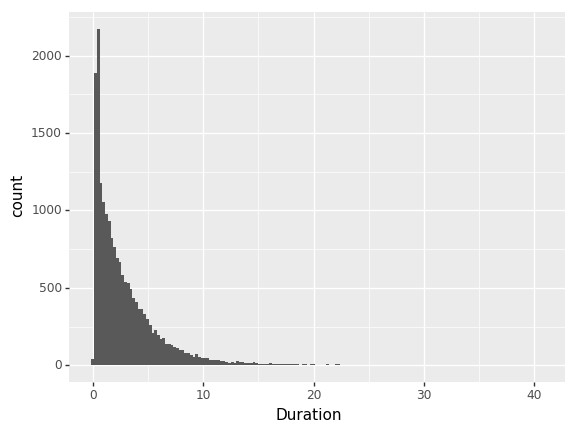

<ggplot: (-9223363274255503072)>

/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 88 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


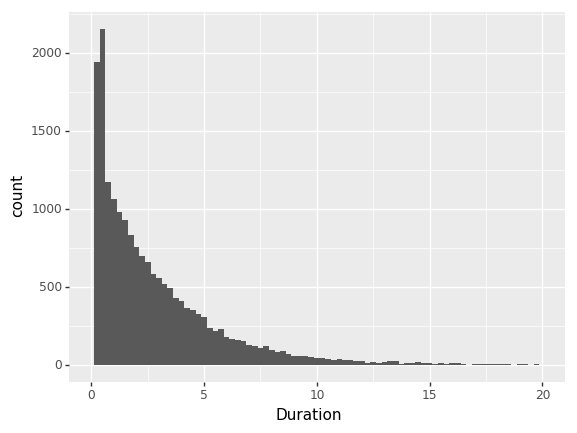

<ggplot: (8762599976200)>

In [41]:
ggplot(durations_df, aes(x="Duration")) + geom_histogram()
# ggplot(durations_df, aes(x="Duration")) + geom_histogram() + xlim(0.0, 20.0)
buckeye_durations_plot = ggplot(durations_df, aes(x="Duration")) + geom_histogram() + xlim(0.0, 20.0)
buckeye_durations_plot

In [42]:
lengths_df.sort_values(by='Length', ascending=False)

,Length
14896,183
800,142
5688,141
15157,135
14881,125
14768,114
5840,113
17011,113
17068,112
14888,109


/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 173'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


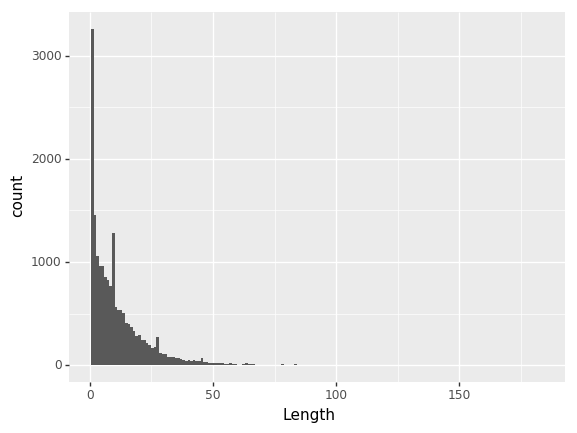

<ggplot: (-9223363274254905740)>

/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 57'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 193 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


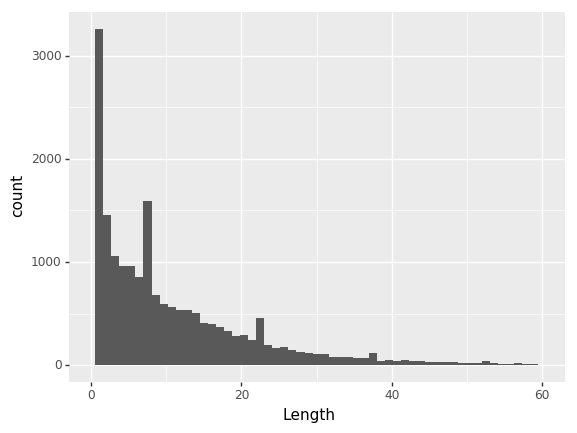

<ggplot: (8762599272740)>

In [43]:
ggplot(lengths_df, aes(x="Length")) + geom_histogram()
# ggplot(lengths_df, aes(x="Length")) + geom_histogram() + xlim(0.0, 60.0)
buckeye_length_plot = ggplot(lengths_df, aes(x="Length")) + geom_histogram() + xlim(0.0, 60.0)
buckeye_length_plot